In [1]:
#dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from twitconfig import consumer_key, consumer_secret, access_token, access_token_secret, bot_url
import time
import os

#vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#twitter authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

print(f"Accessing {bot_url} ...")

Accessing https://twitter.com/lumpytweetbot ...


In [2]:
#Returns a scatter plot of the given user's compound polarity score for the most recent 500 tweets
def scatterplotter(user):
    target_user = user
    
    counter = 1
    
    #this will be used to make a DataFrame later
    sentiments = []
    
    oldest_tweet = None
    
    #5 pages is 100 tweets
    for x in range(20):

        public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

        for tweet in public_tweets:

            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            oldest_tweet = tweet['id'] - 1

            sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})

            counter += 1
    
    #Creates Pandas DataFrame we will use to plot
    sentiments_pd = pd.DataFrame.from_dict(sentiments)
    
    #Scatterplot
    plt.figure(figsize=(9,6))
    x_vals = sentiments_pd["Tweets Ago"]
    y_vals = sentiments_pd["Compound"]
    plt.plot(x_vals, y_vals, marker="o", color='blue', linewidth=0.5, alpha=0.8)
    
    now = datetime.now()
    now = now.strftime("%Y-%m-%d %H:%M")
    plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
    plt.xlim([x_vals.max(),x_vals.min()])
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    plt.grid(True)
    plt.show()


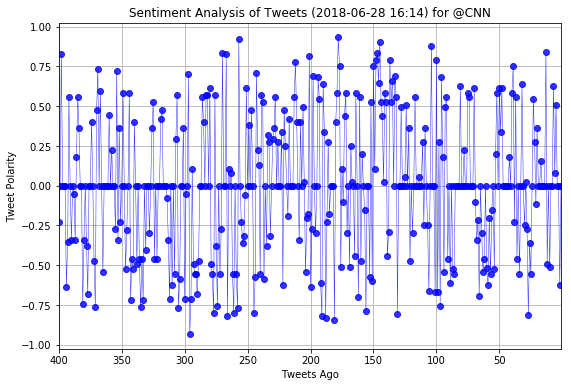

In [3]:
scatterplotter("@CNN")

In [ ]:
#When a user tweets the following: @lumpytweetbot Analyze: @CNN
#It will call that '@CNN' as a string and respond with the results of the scatterplotter function + a thank you and mention back

def analyzerbot()